In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os


from ipywidgets import interact, fixed

# from beeid.video2 import Video
from beeid.body import Body
from beeid.frame import Frame
from beeid.video import Video
from beeid.track import Track
from beeid.utils import read_json
import beeid.videoplotter as vplt

from collections import defaultdict


import cv2

/home/jchan/beepose_fork/beeid/beeid/utils.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]

In [4]:
VIDEO_PATH = '../../bee/videos/C02_170622120000.mp4'
DETECTION_PATH = '../../bee/videos/OUTPUT/merged_C02_170622120000_detections.json'

TRACK_PATH = '../../bee/videos/OUTPUT/track_nms_merged_C02_170622120000_detections.json'
ID_TRACK_PATH = '../../bee/videos/OUTPUT/id_nms_track_merged_C02_170622120000_detections.json'

NEW_ID_TRACK_PATH = "id_nms_track_merged_C02_170622120000_detections_fixed_radio_30_2_frame_window.json"
NEW_TRACK_PATH = "track_nms_merged_C02_170622120000_detections_fixed_radio_30_2_frame_window.json"

NEW_ID_TRACK_PATH = "id_nms_track_merged_C02_170622120000_detections_same_frame.json"
NEW_TRACK_PATH = "track_nms_merged_C02_170622120000_detections_same_frame.json"

OUTPUT_PATH = '/mnt/storage/work/jchan/bees/data/beeid/'

# TRACK_PATH = '../../bee/videos/OUTPUT/merged_C02_170622120000_detections.kalman_tracks.json'
# ID_TRACK_PATH = '../../bee/videos/OUTPUT/merged_C02_170622120000_detections.id_kalman_tracks.json'

In [ ]:
config = {
    'DETECTIONS_PATH': DETECTION_PATH,
    'VIDEO_PATH': VIDEO_PATH,
    'TRACK_PATH': NEW_TRACK_PATH,
    'ID_TRACK_PATH': NEW_ID_TRACK_PATH
}

In [ ]:
#video = Video.from_config(config, load_image=True) #This is slower but speedup the exporting
video = Video.from_config(config) # Faster recomend for just ploting

In [ ]:
vplt.parts(video[0])

In [ ]:
vplt.imshow(video[0]);

In [ ]:
vplt.imshow(video[0][0]);

In [ ]:
vplt.bbox(video[0]);

In [ ]:
vplt.skeleton(video[0]);

In [ ]:
vplt.tracks(video[0])
plt.savefig("bees.png")

In [ ]:
vplt.skeleton(video[0][5]);

In [ ]:
trks = video.tracks

## Video API

## Create Video Object from config dictionary

In [ ]:
video  = Video.from_config(config)

## Common Functions

In [ ]:
print(video)

In [ ]:
len(video) # return the amount of frames

In [ ]:
video.config

Access to tracks:

In [ ]:
tracks = video.tracks
# tracks

Access to frames:

In [ ]:
frames = video.frames

In [ ]:
for frame in video:
    pass # iterate throught frames

In [ ]:
n = 10
nth_frame = video[n]
print(nth_frame)

### Slicing Video

In [ ]:
short_video = video[:10]
double_speed_video = video[::2]

len(short_video), len(double_speed_video)

## Frame API

In [ ]:
frame = video[2] # 0 - (len(video) - 1)
type(frame)

The frame object contains body objects 

In [ ]:
len(frame) # return the amount of body detected in this frame

In [ ]:
print(frame)

In [ ]:
body = frame[0] # Accesing to the body

In [ ]:
for body in frame:
    print(body.info())

## Plotting Frame

In [ ]:
vplt.plot(frame, skeleton=True, bbox=True, tracks=True);

In [ ]:
vplt.skeleton(frame)

In [ ]:
vplt.bbox(frame)

In [ ]:
vplt.plot(frame, skeleton=True, bbox=True, min_parts=5) #Filter bodies with less than 5 parts detected

In [ ]:
vplt.plot(frame, skeleton=True, bbox=True, min_parts=3) #Filter bodies with less than 3 parts detected

In [ ]:
vplt.plot(frame, skeleton=True, bbox=True, min_parts=3, tracks=True) #plot tracks

## Get the image

In [ ]:
plt.imshow(frame.image); # .image method

## Save the frame

In [ ]:
# .save(folder, args) has the same args as .plot() and .image() plus the path to save.
# frame.save('frames/', args) # uncomment this to save the frame
frame.save('frames/', skeleton=True, bbox=True, min_parts=5, tracks=True)

## Body API

In [ ]:
body = frame[0]
type(body)

In [ ]:
print(body)

In [ ]:
len(body) # return amount of detected parts of the body

In [ ]:
print("Body id: {}, Frame id: {}".format(body.id, body.frameid))

In [ ]:
body.angle, body.center

In [ ]:
body.info()

In [ ]:
vplt.imshow(body)

In [ ]:
vplt.skeleton(body)

## Extracting bodies from frame

In [ ]:
# this return the image
# bodies_crop = frame.extract_bodies(width=200, height=400)
# type(bodies_crop), bodies_crop.shape

In [ ]:
# @interact(i=(0, len(bodies_crop)-1, 1))
# def p(i):
#     plt.figure(figsize=(4,4))
#     plt.imshow(bodies_crop[i,...])

## Exporting

In [ ]:
# del video
video = Video.from_config(config, load_image=True) #'load_image' will be accelerate the exporting.

In [ ]:
# this will call .save() to all the frame in the video.
video.export(os.path.join(OUTPUT_PATH, "test_export_2_no_tracks/video"), skeleton=True, bbox=False, tracks=False, min_parts=5, max_workers=40)

To convert the folder to video used the follwing comand:

```
ffmpeg -r 60 -f image2 -s 1920x1080 -i folder/%09d.jpg -vcodec libx264 -crf 25  -pix_fmt yuv420p video.mp4
```

In [ ]:
# this will call .save() to all the bodies in all frames in the video.
# plus save a dataset.csv which is .info() + path to the image for all the bodies.
video.export_bodies(os.path.join(OUTPUT_PATH, "extract_bodies_with_json2/"), max_workers=20)

In [ ]:
video.save("save.json")

In [4]:
# v = Video.load("../../bee/videos/OUTPUT/C02_170622140000_skeleton.json")
v = Video.load("../../../bee/videos/OUTPUT/C02_170622120000_skeleton.json")
v.load_video("../../../bee/videos/C02_170622120000.mp4")

FileNotFoundError: [Errno 2] No such file or directory: '../../../bee/videos/OUTPUT/C02_170622120000_skeleton.json'

In [5]:
v

Video(name=C02_170622120000.mp4, detections=merged_C02_170622120000_detections.json, len=6000)

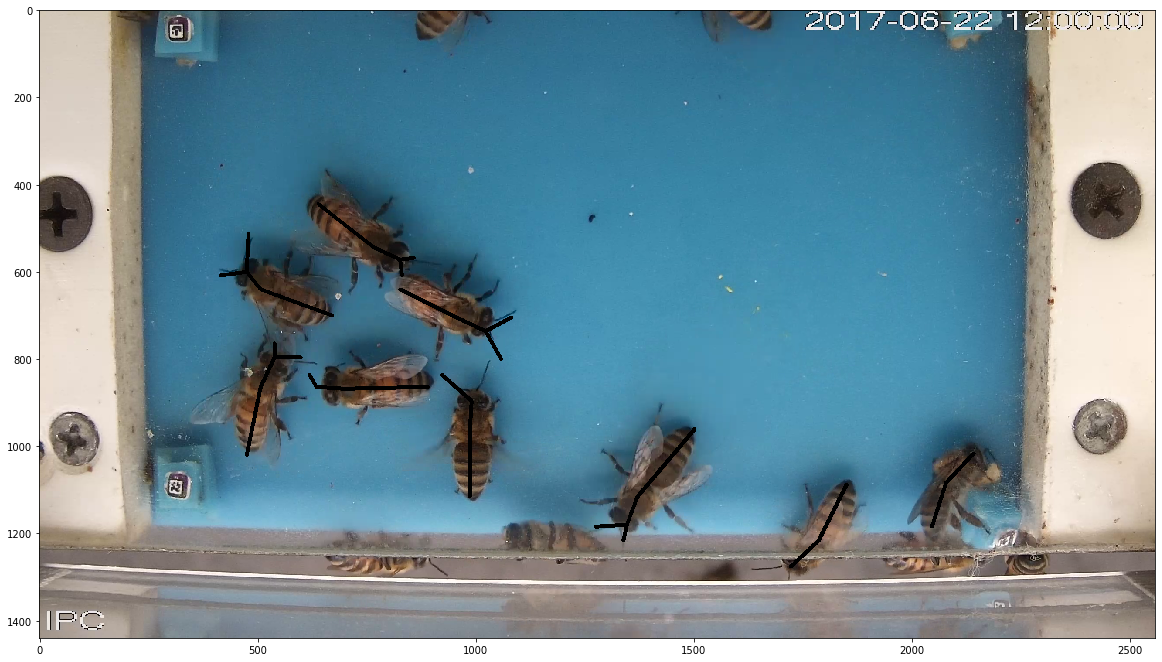

In [6]:
vplt.skeleton(v[11])

In [7]:
Body.width = 150
Body.height = 350

Body(id=-1, parts={1: [(828, 640)], 2: [(1024, 736)], 3: [(956, 704)], 4: [(1060, 800)], 5: [(1084, 704)])

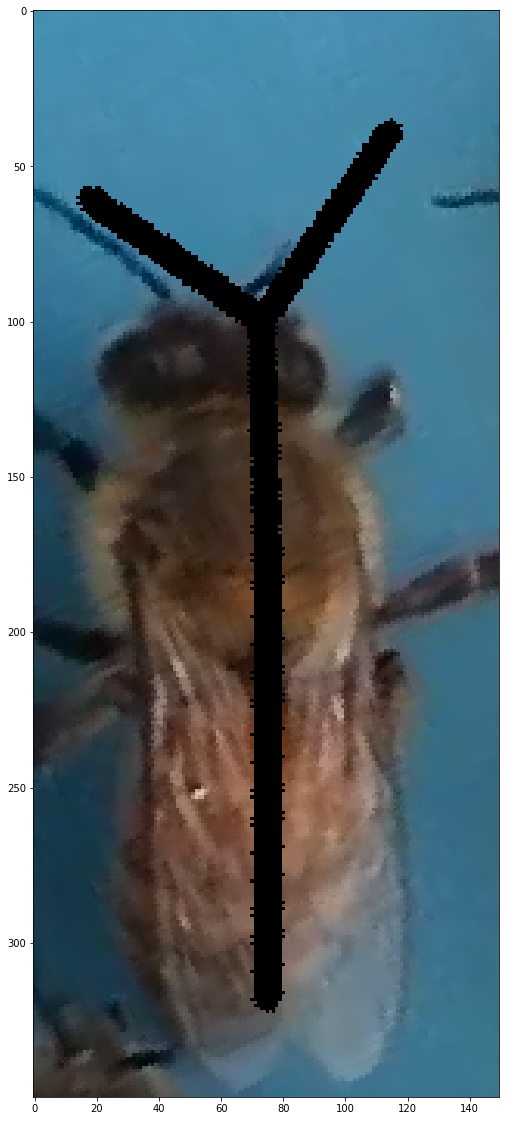

In [22]:

vplt.skeleton(v[11][0])
v[11][0]

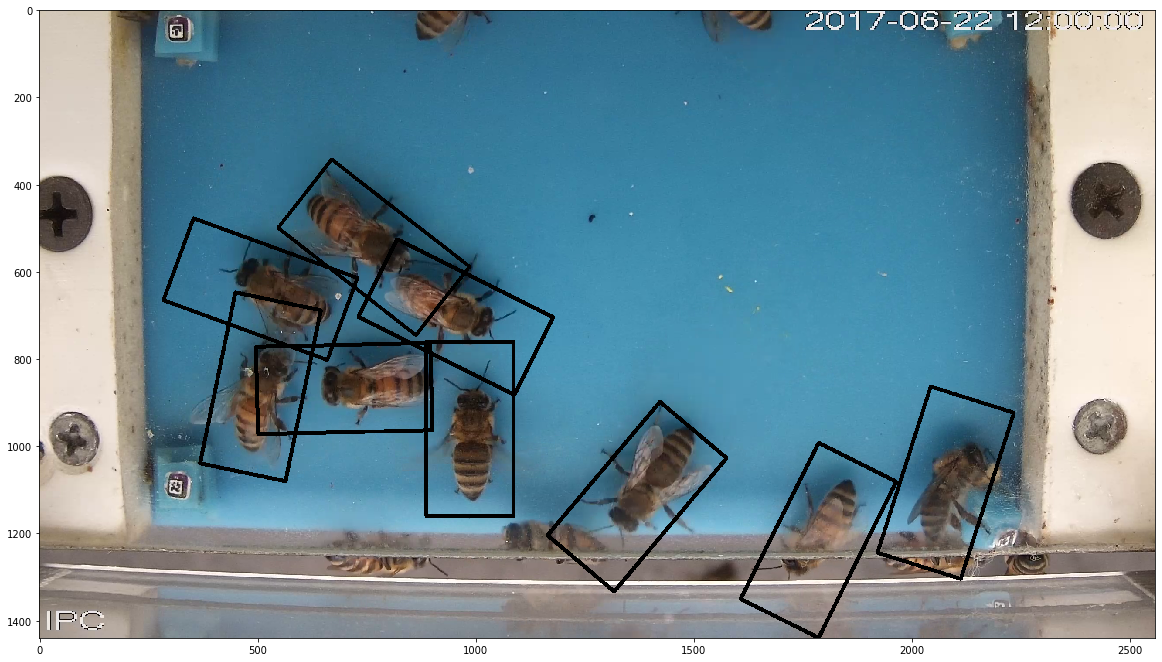

In [23]:
vplt.bbox(v[11])

In [10]:
tagged = list()
for frame in v:
    for body in frame:
        if body.tag is not None:
            tagged.append(body.tag)

None
None
None
None
None
None
None
None
None
None


In [146]:
v.config

{'DETECTIONS_PATH': 'bee/videos/OUTPUT/merged_C02_170622120000_detections.json',
 'VIDEO_PATH': 'bee/videos/C02_170622120000.mp4'}

In [147]:
v.config['DETECTIONS_PATH'] = '../../../' + v.config['DETECTIONS_PATH']
v.config['VIDEO_PATH'] = '../../../' + v.config['VIDEO_PATH']

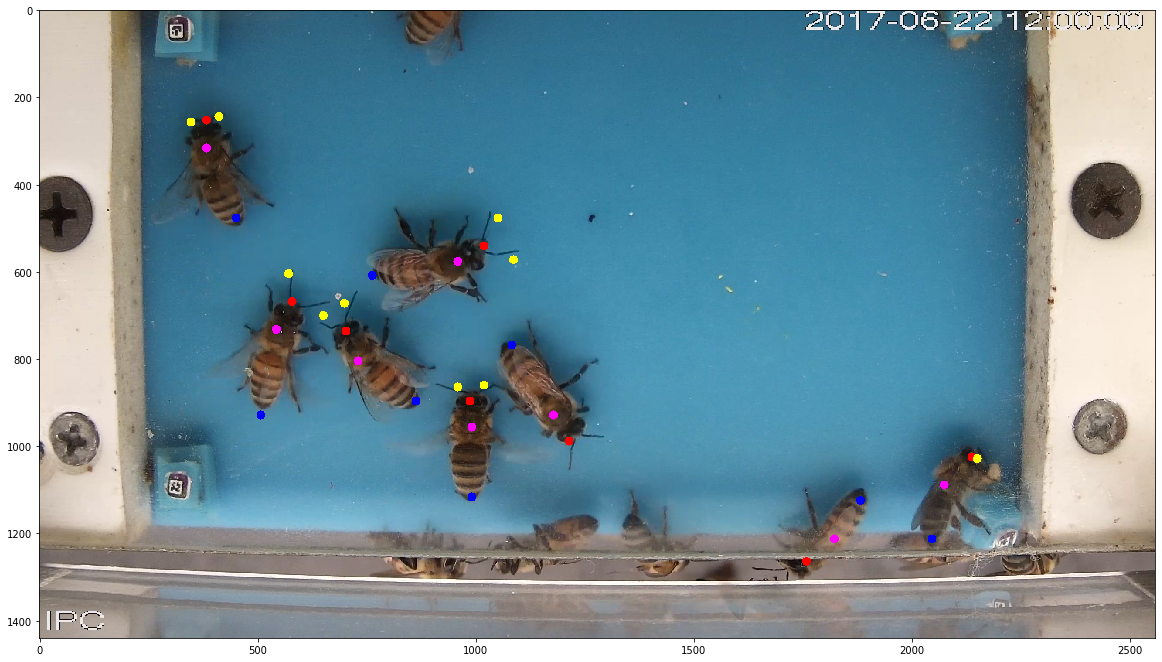

In [148]:
vplt.parts(v[20])

In [8]:
v[0][0]._connections

[[1, 3], [3, 2], [2, 4], [2, 5]]

In [9]:
v[0][2]

Body(id=-1, parts={1: [(1760, 1056)], 3: [(1800, 1180)])

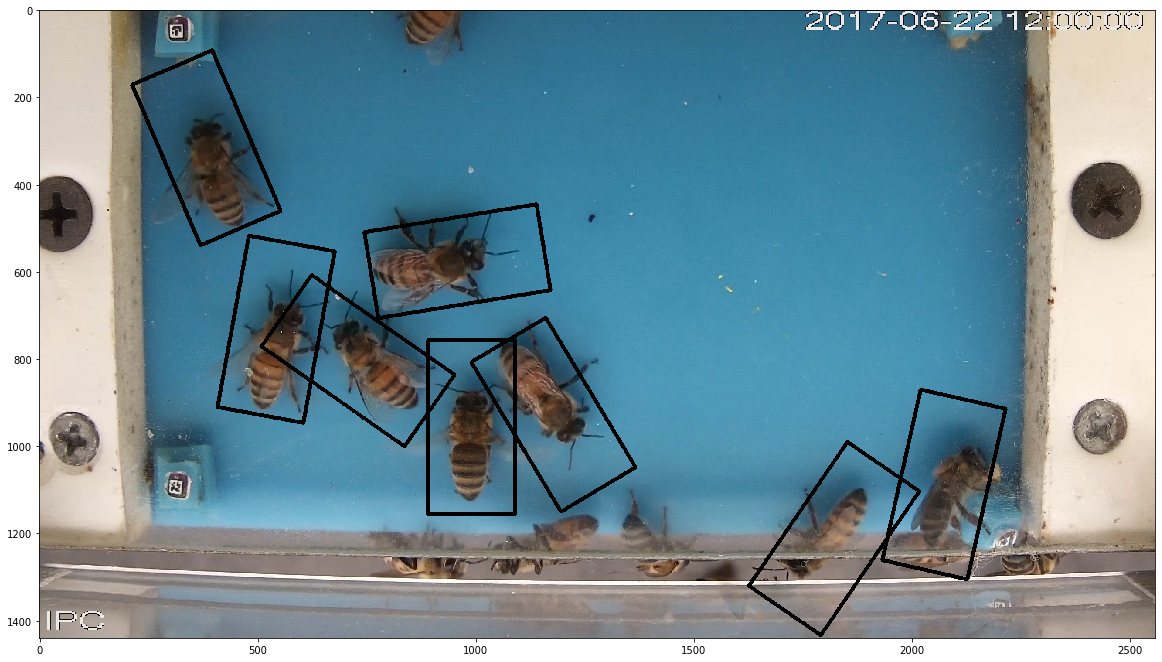

In [39]:
vplt.bbox(v[20])

In [40]:
v[0][0], v[0][0].suppressed

(Body(id=-1, parts={1: [(416, 288)], 2: [(636, 384)], 3: [(572, 352)], 4: [(672, 448)], 5: [(724, 384)]),
 False)

In [149]:
v.sort_tracking(bbox=200)

In [150]:
v[0][0], v[0][0].suppressed

(Body(id=1.0, parts={1: [(416, 288)], 2: [(636, 384)], 3: [(572, 352)], 4: [(672, 448)], 5: [(724, 384)]),
 False)

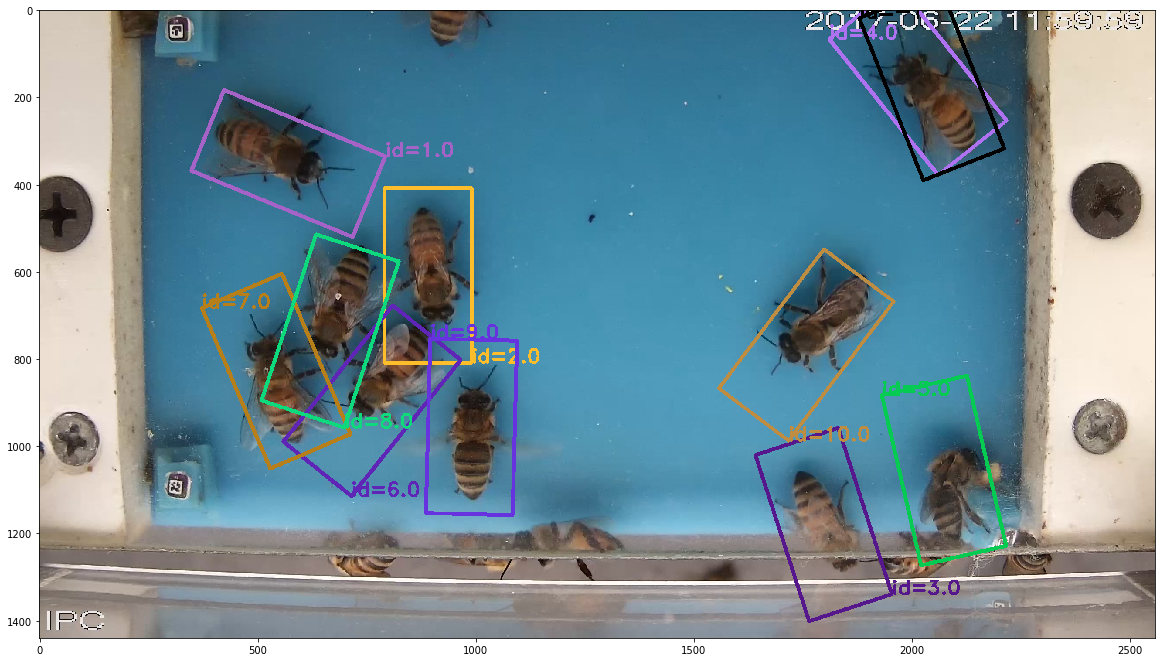

In [151]:
vplt.bbox(v[0], True)

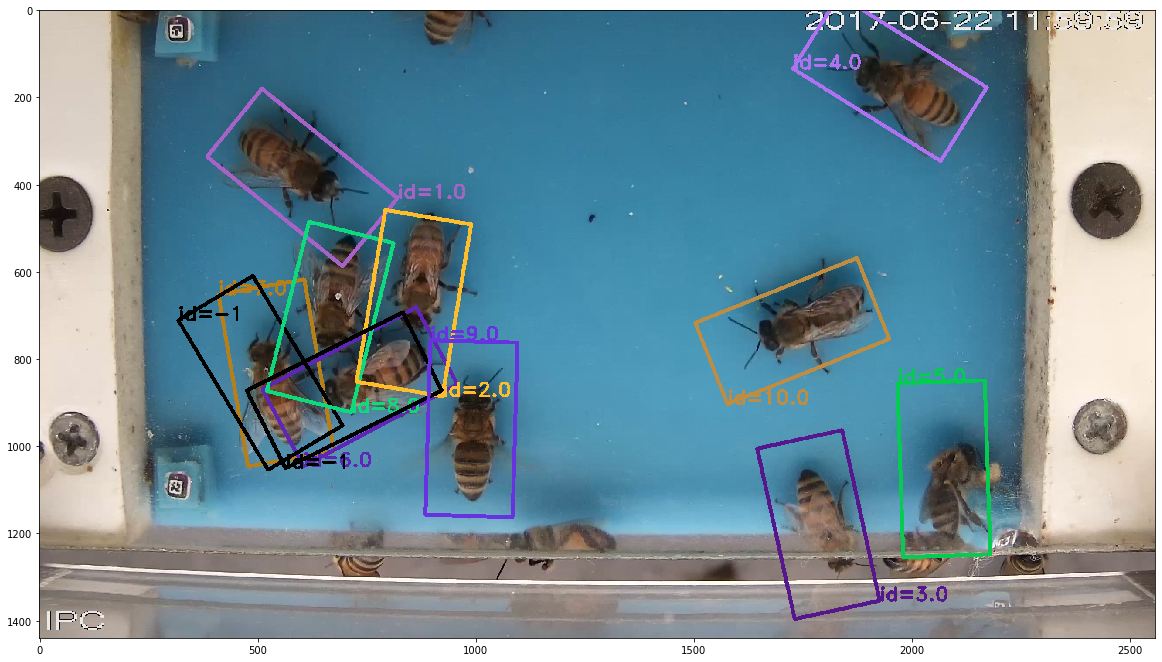

In [152]:
vplt.bbox(v[1], True)

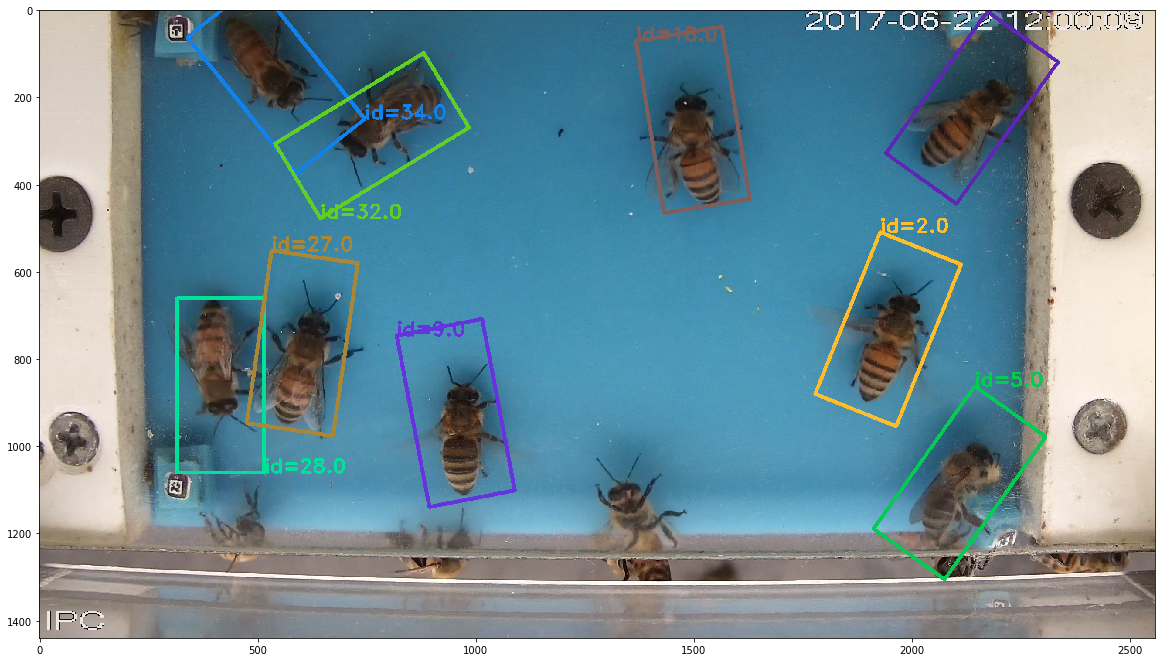

In [153]:
vplt.bbox(v[200], True)

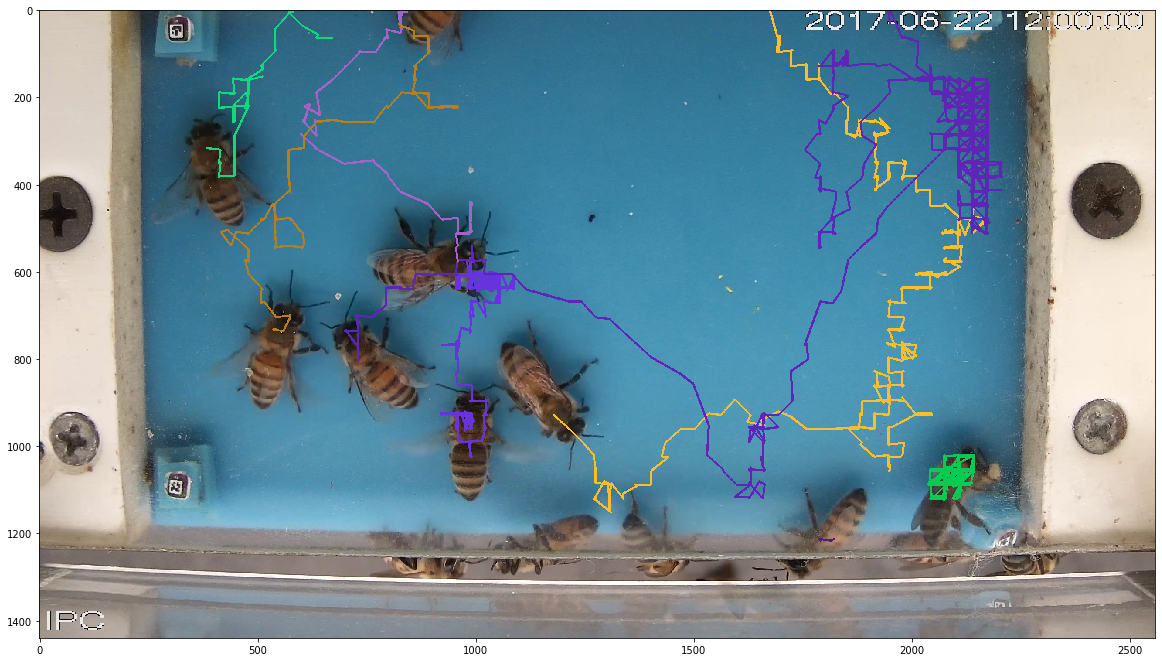

In [154]:
vplt.tracks(v[20])

In [156]:
v.export("frames", max_workers=40)

In [ ]:
def f(i):
    vplt.imshow(pollen_bees[i])
    plt.title(pollen_bees[i].pollen_score)
    print(pollen_bees[i].center)
    
interact(f, i=(0, len(pollen_bees)-1, 1))